In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
flow_path = "./DLOW/generated/block0_zoom-out-tilt-up/all_videos_flows.npy"

In [3]:
def generate_camera_trajectory(flow: np.ndarray) -> np.ndarray:
    """
    生成相机轨迹
    :param flow: 光流，形状 (15, 2, 256, 256)
    :return: 相机轨迹，形状 (15, 9)
    """

    camera_trajectory = []

    for i in range(15):  # 16 帧，有 15 组光流
        flow_uv = flow[i]  # 形状 (2, 256, 256)
        h, w = flow_uv.shape[1:]

        # 生成网格点
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        pts1 = np.stack([X.ravel(), Y.ravel()], axis=1).astype(np.float32)
        pts2 = pts1 + flow_uv.reshape(2, -1).T  # 应用光流偏移

        # 计算单应性矩阵
        H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

        if H is not None:
            camera_trajectory.append(H.flatten())

    camera_trajectory = np.array(camera_trajectory)  # (14, 9)
    return camera_trajectory

camera_trajectory = generate_camera_trajectory(np.load(flow_path)[0])
print(camera_trajectory.shape)

(15, 9)


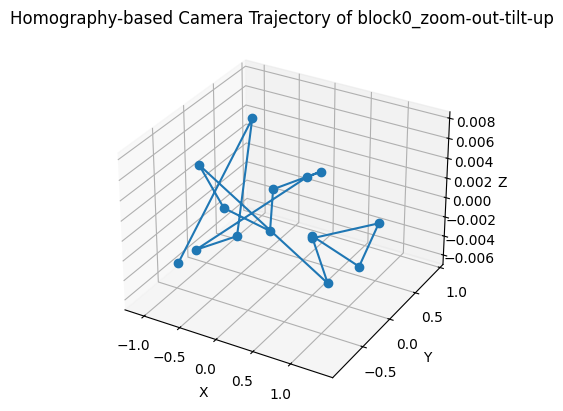

In [4]:
# PCA 进一步降维
pca = PCA(n_components=3)
reduced_traj = pca.fit_transform(camera_trajectory)

# 画轨迹
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(reduced_traj[:, 0], reduced_traj[:, 1], reduced_traj[:, 2], marker='o')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Homography-based Camera Trajectory of block0_zoom-out-tilt-up")
plt.show()

In [5]:
flow_path = "./DLOW/generated/zoom-out/all_videos_flows.npy"
camera_trajectory = generate_camera_trajectory(np.load(flow_path)[0])
print(camera_trajectory.shape)

(15, 9)


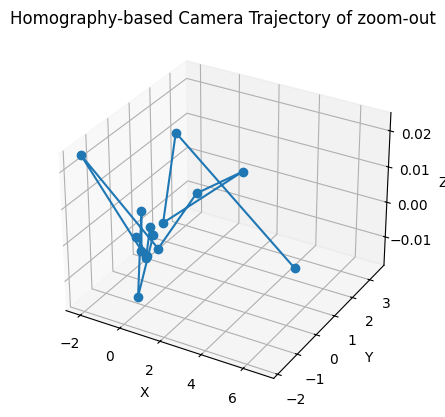

In [6]:
# PCA 进一步降维
pca = PCA(n_components=3)
reduced_traj = pca.fit_transform(camera_trajectory)

# 画轨迹
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(reduced_traj[:, 0], reduced_traj[:, 1], reduced_traj[:, 2], marker='o')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Homography-based Camera Trajectory of zoom-out")
plt.show()

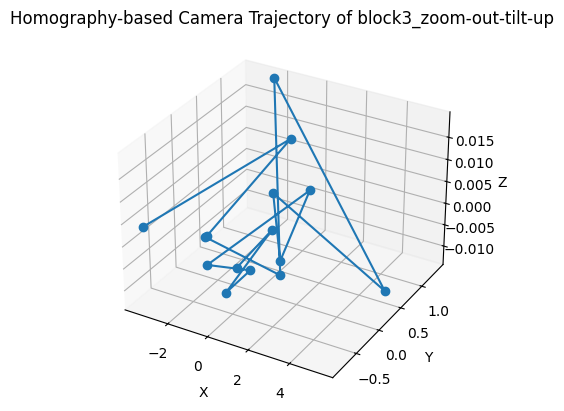

In [11]:
flow_path = "./DLOW/generated/block3_zoom-out-tilt-up/all_videos_flows.npy"
camera_trajectory = generate_camera_trajectory(np.load(flow_path)[0])
# PCA 进一步降维
pca = PCA(n_components=3)
reduced_traj = pca.fit_transform(camera_trajectory)

# 画轨迹
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(reduced_traj[:, 0], reduced_traj[:, 1], reduced_traj[:, 2], marker='o')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Homography-based Camera Trajectory of block3_zoom-out-tilt-up")
plt.show()

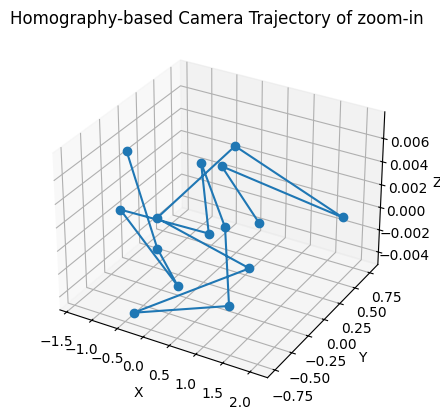

In [8]:
flow_path = "./DLOW/generated/zoom-in/all_videos_flows.npy"
camera_trajectory = generate_camera_trajectory(np.load(flow_path)[0])
# PCA 进一步降维
pca = PCA(n_components=3)
reduced_traj = pca.fit_transform(camera_trajectory)

# 画轨迹
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(reduced_traj[:, 0], reduced_traj[:, 1], reduced_traj[:, 2], marker='o')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Homography-based Camera Trajectory of zoom-in")
plt.show()